In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ml-dataset/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.head().columns.to_list()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df['furnishingstatus'].nunique()

3

In [8]:
unique_items = df['furnishingstatus'].unique()
unique_items

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

## Encoding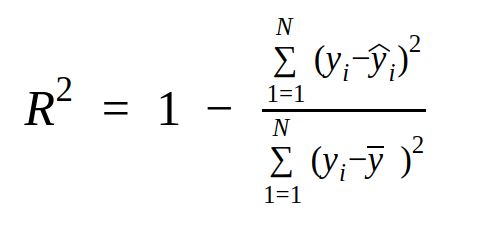

In [9]:
# Initialize an empty list to store columns with data type 'object'
object_columns = []

# Iterate through the columns of the DataFrame
for column in df.columns:
    # Check if the data type of the column is 'object'
    if df[column].dtype == 'object':
        # If the data type is 'object', append the column name to the list
        object_columns.append(column)

print(object_columns)


['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
# enc = OrdinalEncoder()

# df['mainroad']=enc.fit_transform(df[['mainroad']])
# df['guestroom'] = enc.fit_transform(df[['guestroom']])

# Initialize the OrdinalEncoder
enc = OrdinalEncoder()

# Columns to encode
columns_to_encode = ['mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Encode each column in the DataFrame
for column in columns_to_encode:
    df[column] = enc.fit_transform(df[[column]])




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    object 
dtypes: float64(6), int64(6), object(1)
memory usage: 55.5+ KB


In [13]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished


In [14]:
# Define the categories for furnishingstatus
rank = ['unfurnished', 'semi-furnished', 'furnished']

# Initialize the OrdinalEncoder with specified categories
oe = OrdinalEncoder(categories=[rank])

# Fit and transform the 'furnishingstatus' column using the encoder
df['furnishingstatus'] = oe.fit_transform(df[['furnishingstatus']])

In [15]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0


In [18]:
# now check
duplicates = df[df.duplicated(keep='first')]
duplicates

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [22]:
df_no_duplicates = df.drop_duplicates() # drop duplicates
df_no_duplicates.shape

(545, 13)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

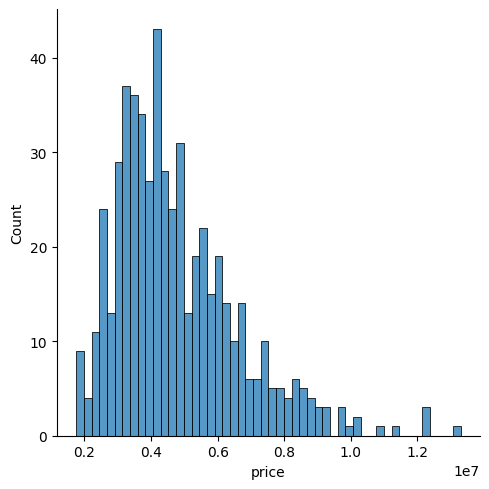

In [17]:
sns.displot(df_no_duplicates['price'],bins=50)

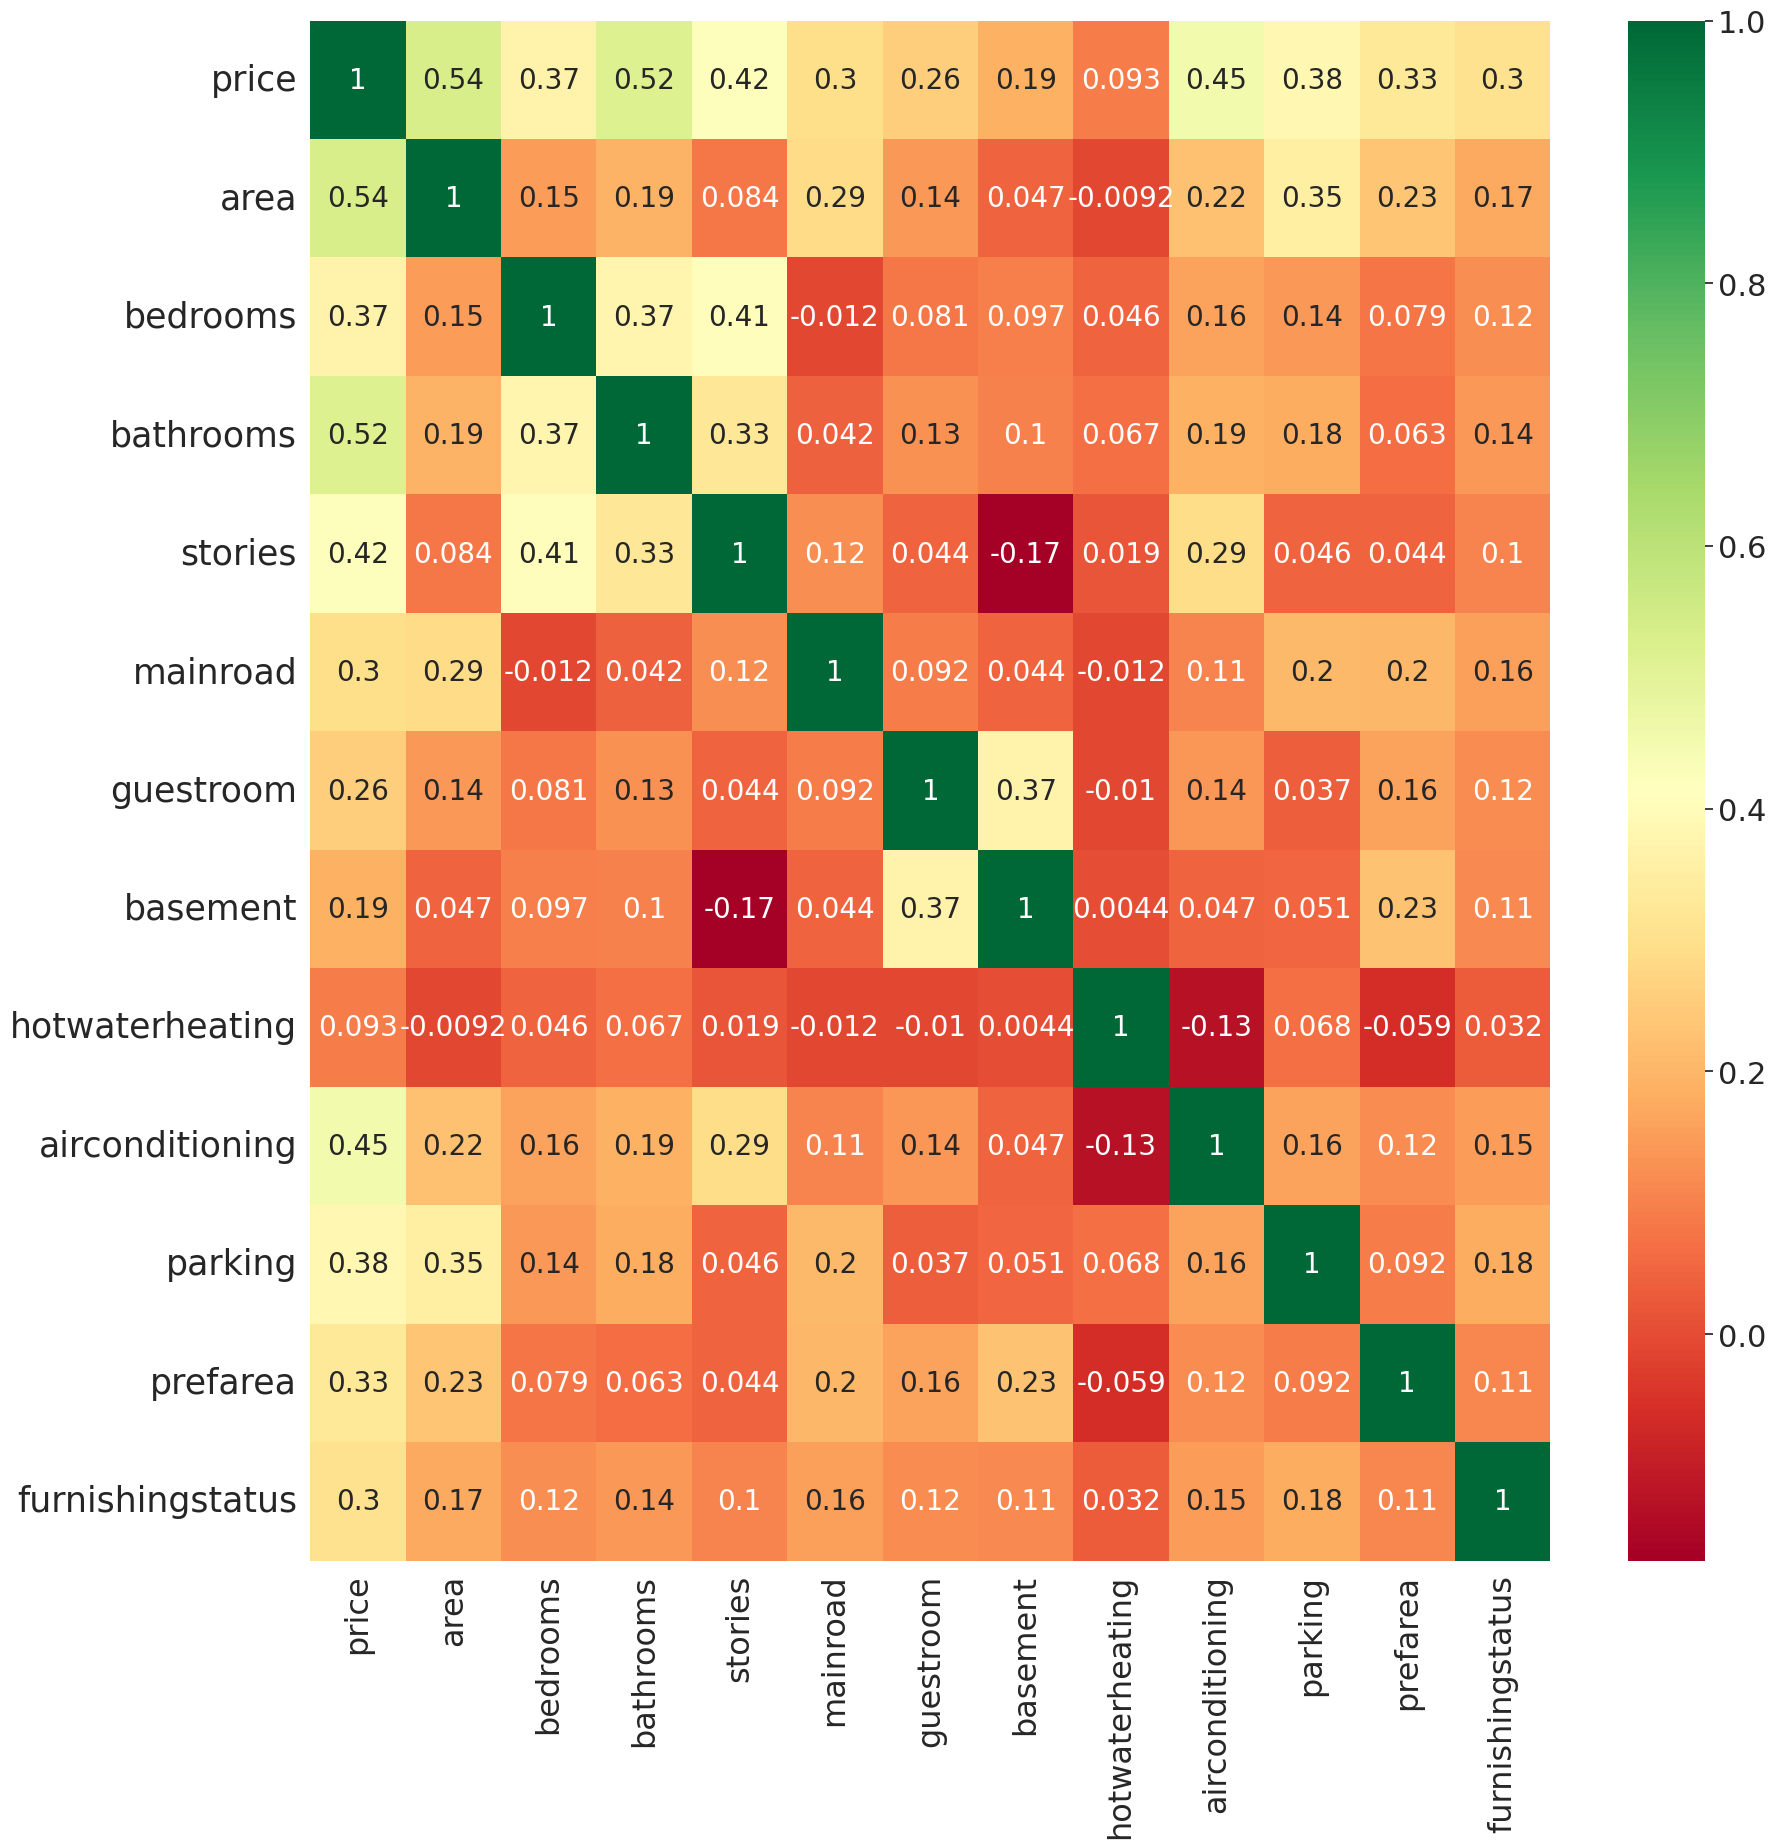

In [25]:
# heat map draw

sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df_no_duplicates.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size':20})
plt.yticks(fontsize=25)
plt.xticks(fontsize=23)  # You had a typo here, it should be 'xticks' not 'yticks'
plt.show()


In [27]:
# just values of corr for a particular parts
correlations = df_no_duplicates.corr(method='pearson')
print(correlations['bedrooms'].sort_values(ascending=False).to_string())

bedrooms            1.000000
stories             0.408564
bathrooms           0.373930
price               0.366494
airconditioning     0.160603
area                0.151858
parking             0.139270
furnishingstatus    0.123244
basement            0.097312
guestroom           0.080549
prefarea            0.079023
hotwaterheating     0.046049
mainroad           -0.012033


# Feature extraction

In [28]:
X = df.drop(['price'],axis=1)
y=df['price']

In [48]:
X.head(1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0


In [30]:
print(f'x_shape = {X.shape} and y_shape = {y.shape}')

x_shape = (545, 12) and y_shape = (545,)


In [31]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

## Scalling

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [33]:
scaler1=MinMaxScaler()
MinMax_scaler_df = scaler1.fit_transform(X)
MinMax_scaler_df

# scaler2=StandardScaler()
# Standard_scaler_df = scaler2.fit_transform(X)
# Standard_scaler_df

array([[0.39656357, 0.6       , 0.33333333, ..., 0.66666667, 1.        ,
        1.        ],
       [0.5024055 , 0.6       , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08659794, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## LR

In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

y= Wx+b <br>
W is weight(slope)  b is Bias (intercept term / constant )

In [35]:
reg.fit(X_train,y_train)


LinearRegression()

In [36]:
y_pred = reg.predict(X_test)

In [37]:
y_pred

array([2854190.69289522, 4173149.63854603, 4490722.573655  ,
       5193085.32046116, 4365213.27118409, 5215262.15360186,
       2781978.7128868 , 4905188.57636555, 3138062.93621898,
       4384165.81690217, 6798275.67386159, 4723173.05234178,
       2656059.75870449, 2222889.35372493, 5438673.71444498,
       3253697.57598679, 3424794.99560837, 3950091.06167866,
       4799444.04200491, 3606772.11565893, 6408369.61194613,
       5296496.78584484, 3209270.2036582 , 4811919.95961559,
       6680063.3660237 , 4786931.5355358 , 5573082.26662281,
       7662893.03459934, 6549622.30413867, 3998209.94481741,
       5379604.33887244, 6305803.53005467, 3787012.2775547 ,
       6543738.01497213, 6981088.84388401, 4065753.43636708,
       5996573.54050104, 7357599.28647275, 3845774.79796118,
       3432495.47092022, 6817909.111259  , 4613342.36827545,
       3601385.52298222, 2741354.78634296, 6975103.43971664,
       2983579.96441394, 3901591.56458579, 4241063.16402605,
       3655276.93534331,

In [38]:
y_test

410    3430000
488    2852500
27     8400000
147    5600000
407    3465000
        ...   
49     7420000
274    4340000
118    5950000
491    2835000
435    3290000
Name: price, Length: 109, dtype: int64

In [39]:
from sklearn.metrics import r2_score,mean_squared_error , mean_absolute_error
import math


### <font color='red'>r2 formula

$$
R^2 = 1 - \frac{{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$




In [40]:
R2 = r2_score(y_pred,y_test)
print(R2)

0.4883970100838897


In [41]:
MSE = mean_squared_error(y_pred,y_test)

In [42]:
MSE

1149365672158.5828

In [43]:
RMSE=math.sqrt(MSE)

In [44]:
RMSE

1072084.7317999557

In [45]:
MAE = mean_absolute_error(y_pred,y_test)

In [46]:
MAE

770022.3311283136

In [47]:
# Acuracy does not suits Regressions

In [55]:
# Assuming you have the features in a DataFrame named 'input_features'
input_features = pd.DataFrame({
    'area': [7423],
    'bedrooms': [1],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': [1.0],
    'guestroom': [0.0],
    'basement': [0.0],
    'hotwaterheating': [0.0],
    'airconditioning': [1.0],
    'parking': [2],
    'prefarea': [1.0],
    'furnishingstatus': [2.0]
})

# Use the trained model to make predictions
y_pred = reg.predict(input_features)

# Print the predicted value(s)
print(y_pred)


[7360808.89633751]


In [ ]:
area = float(input("Enter area: "))
bedrooms = int(input("Enter number of bedrooms: "))
bathrooms = int(input("Enter number of bathrooms: "))
stories = int(input("Enter number of stories: "))
mainroad = float(input("Enter mainroad (0 or 1): "))
guestroom = float(input("Enter guestroom (0 or 1): "))
basement = float(input("Enter basement (0 or 1): "))
hotwaterheating = float(input("Enter hotwaterheating (0 or 1): "))
airconditioning = float(input("Enter airconditioning (0 or 1): "))
parking = int(input("Enter number of parking spaces: "))
prefarea = float(input("Enter prefarea (0 or 1): "))
furnishingstatus = float(input("Enter furnishingstatus (0, 1, or 2): "))

# Create a DataFrame with the input features
input_features = pd.DataFrame({
    'area': [area],
    'bedrooms': [bedrooms],
    'bathrooms': [bathrooms],
    'stories': [stories],
    'mainroad': [mainroad],
    'guestroom': [guestroom],
    'basement': [basement],
    'hotwaterheating': [hotwaterheating],
    'airconditioning': [airconditioning],
    'parking': [parking],
    'prefarea': [prefarea],
    'furnishingstatus': [furnishingstatus]
})